# Install

In [31]:
!pip install -q --upgrade pandas
!pip install -q --upgrade matplotlib
!pip install -q --upgrade reportlab


# Imports

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.ticker as mtick

from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from PIL import Image as PILImage

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Importing and visualizing the dataset

In [33]:
data_base = "data_base.csv"
data = pd.read_csv(data_base)

In [34]:
data.head(3)

,Método,Qual a sua turma?,Nome Completo,Em que fase está a sua empresa após o programa?,Faturamento antes do programa,Faturamento após o programa,Você gerou quantos empregos durante/após a participação no Inovativa?,Você fez conexões relevantes graças ao programa Inovativa?,"Para você acelerar o seu negócio, o quanto participar do Inovativa foi importante?","Para você crescer a sua renda, o quanto participar do Inovativa foi importante?",...,"Para você encontrar novas ideias e soluções para o seu negócio, o quanto participar do Inovativa foi importante?","Para você ter acesso a novos clientes, o quanto participar do Inovativa foi importante?","Para você fazer conexões relevantes, o quanto participar do Inovativa foi importante?","Para você melhorar a sua competitividade no seu mercado de atuação, o quanto participar do Inovativa foi importante?","Para você ganhar visibilidade, reconhecimento e credibilidade, o quanto participar do Inovativa foi importante?","Em geral, qual o seu nível de satisfação com a metodologia adotada pelo programa?",Grau de escolaridade,Como você se auto declara,Qual seu gênero,Qual o ramo do seu negócio?
0,On-line,Brasilândia,Startup Número 1,Fase de crescimento (aumentando o número de cl...,1500,5000,0,Sim,Muito importante,Muito importante,...,Muito importante,Muito importante,Muito importante,Muito importante,Muito importante,Muito satisfeito,Médio completo,Branca/Branco,Cisgênero Masculino,Saúde
1,Presencial,Brasilândia,Startup Número 2,Operação - a startup já conseguiu validar seu ...,900,1400,0,Sim,Muito importante,Importante,...,Muito importante,Importante,Importante,Importante,Importante,Satisfeito,Superior incompleto,Amarela/Amarelo,Cisgênero Feminino,Educação
2,Presencial,Brasilândia,Startup Número 3,Validação - fase em que o produto ou serviço d...,500,4000,1,Sim,Muito importante,Muito importante,...,Muito importante,Importante,Muito importante,Muito importante,Muito importante,Muito satisfeito,Superior completo,Parda/Pardo,Cisgênero Masculino,Educação


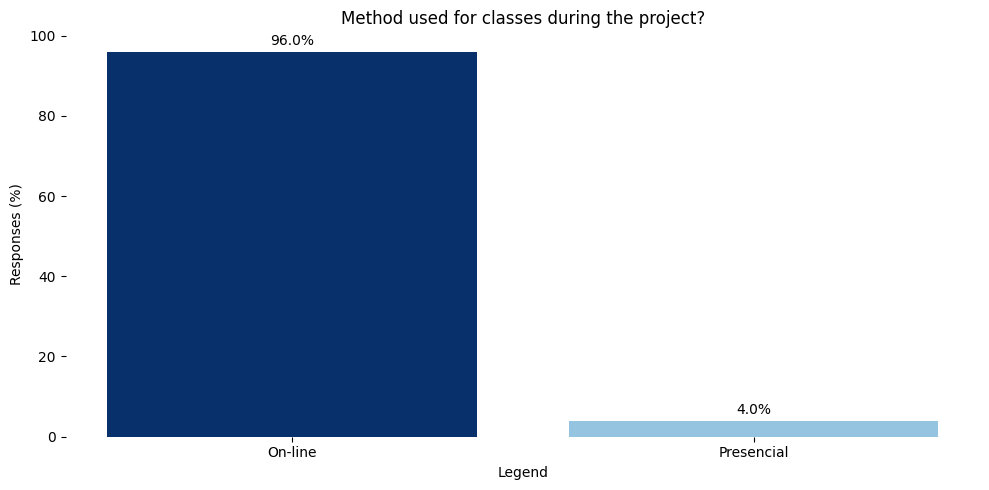

In [35]:
percentages = data["Método"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

colors = cm.Blues(np.linspace(1, 0.4, len(percentages)))

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 1,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title("Method used for classes during the project?")
plt.tight_layout()
plt.savefig("method.png")
plt.show()

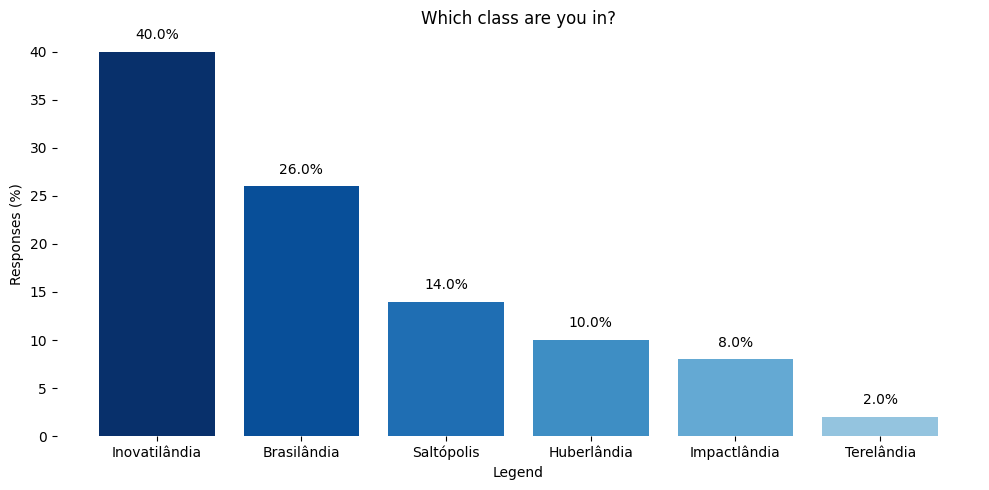

In [36]:
percentages = data["Qual a sua turma?"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

colors = cm.Blues(np.linspace(1, 0.4, len(percentages)))

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 1,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title("Which class are you in?")
plt.tight_layout()
plt.savefig("class.png")
plt.show()

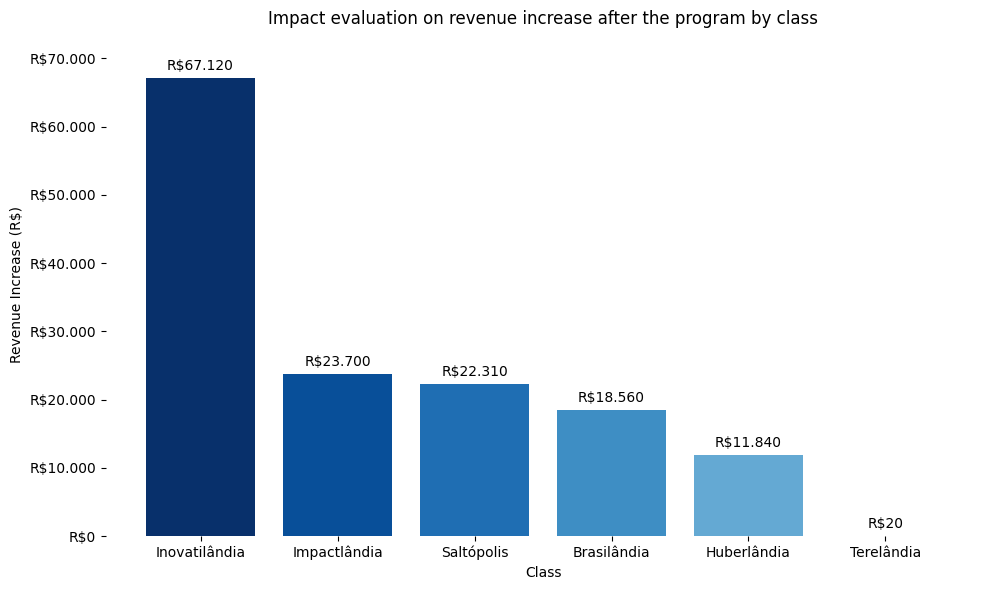

In [37]:
data["Diferenca_Faturamento"] = (
    data["Faturamento após o programa"] - data["Faturamento antes do programa"]
)

data_grouped = (
    data.groupby("Qual a sua turma?")["Diferenca_Faturamento"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))

colors_map = cm.Blues(np.linspace(1, 0.4, len(data_grouped)))
bars = plt.bar(data_grouped.index, data_grouped.values, color=colors_map, edgecolor="none")

y_max = max(data_grouped.values) * 1.1
plt.ylim(0, y_max)

for i, v in enumerate(data_grouped.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"R${v:,.0f}".replace(",", "."),
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"R${int(x):,}".replace(",", "."))
)

plt.xlabel("Class")
plt.ylabel("Revenue Increase (R$)")
plt.title("Impact evaluation on revenue increase after the program by class")
plt.tight_layout()
plt.savefig("amount.png")
plt.show()

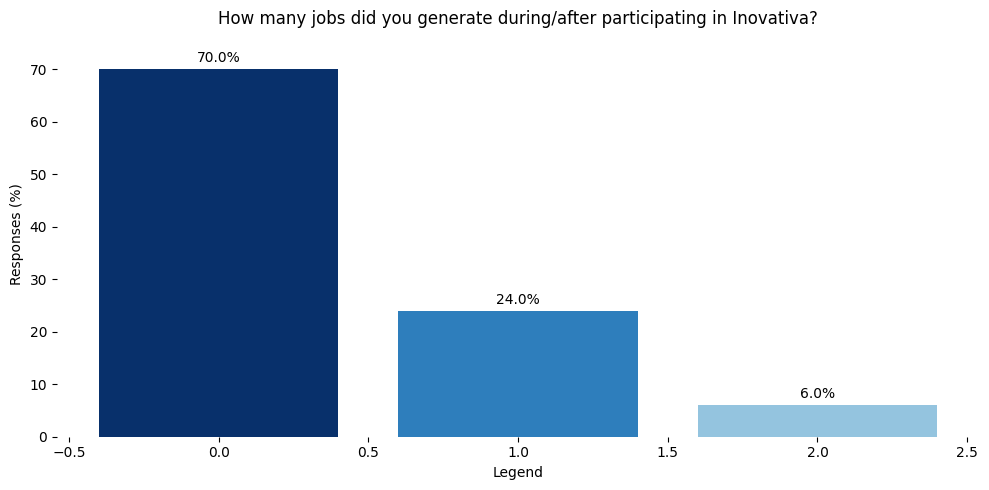

In [38]:
percentages = data[
    "Você gerou quantos empregos durante/após a participação no Inovativa?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)

plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How many jobs did you generate during/after participating in Inovativa?"
)
plt.tight_layout()
plt.savefig("jobs.png")
plt.show()

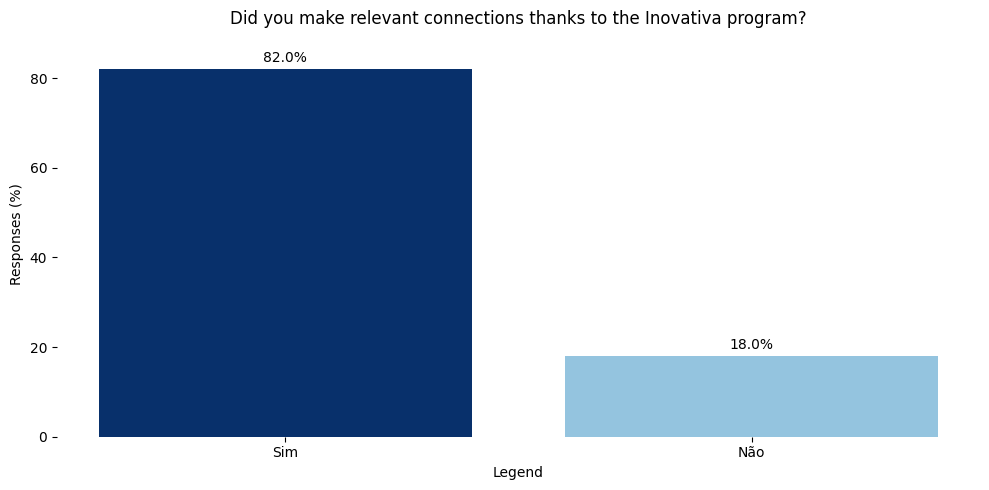

In [39]:
percentages = data[
    "Você fez conexões relevantes graças ao programa Inovativa?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "Did you make relevant connections thanks to the Inovativa program?"
)
plt.tight_layout()
plt.savefig("network.png")
plt.show()

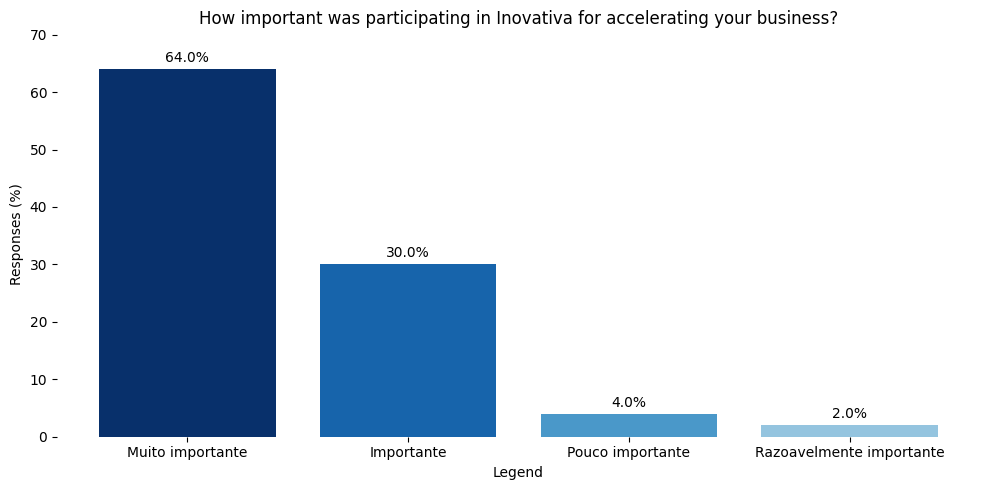

In [40]:
percentages = data[
    "Para você acelerar o seu negócio, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for accelerating your business?"
)
plt.tight_layout()
plt.savefig("startup_acceleration.png")
plt.show()

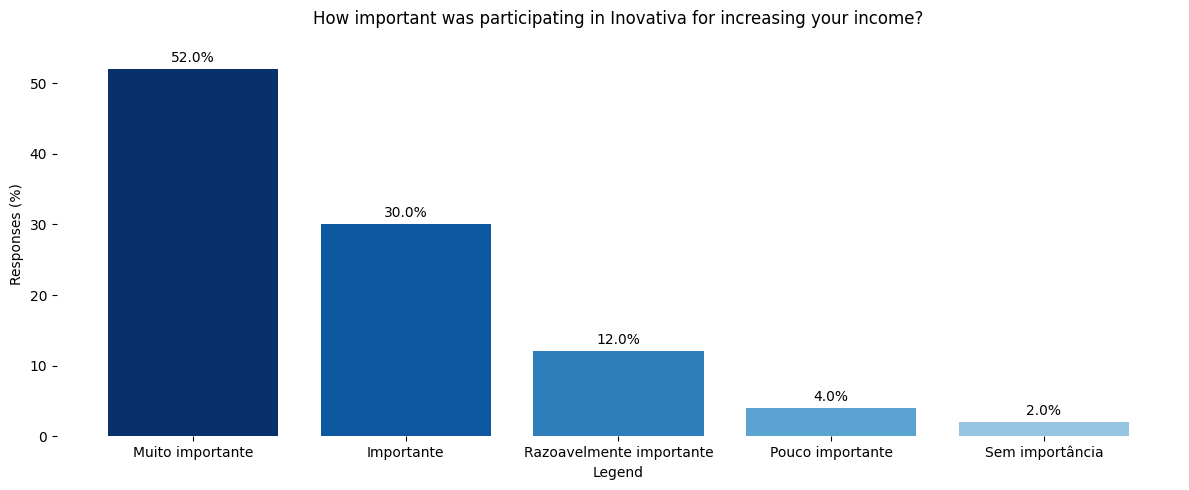

In [41]:
percentages = data[
    "Para você crescer a sua renda, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for increasing your income?"
)
plt.tight_layout()
plt.savefig("income.png")
plt.show()

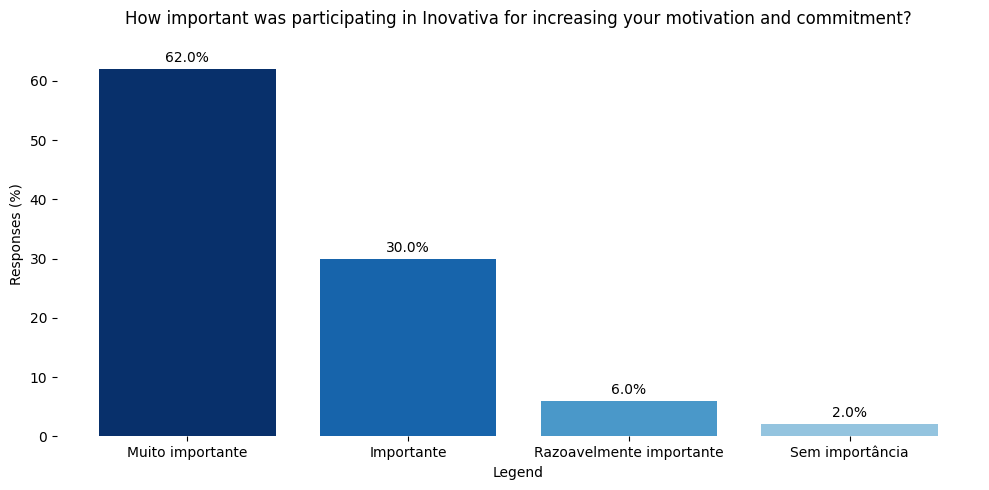

In [42]:
percentages = data[
    "Para você aumentar a sua motivação e comprometimento, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for increasing your motivation and commitment?"
)
plt.tight_layout()
plt.savefig("motivation.png")
plt.show()


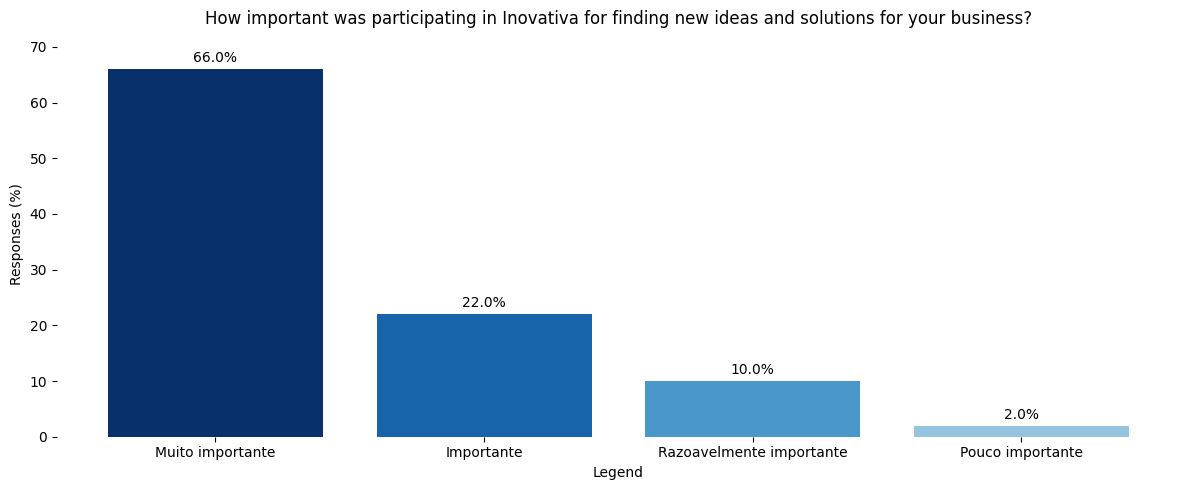

In [43]:
percentages = data[
    "Para você encontrar novas ideias e soluções para o seu negócio, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for finding new ideas and solutions for your business?"
)
plt.tight_layout()
plt.savefig("innovation.png")
plt.show()


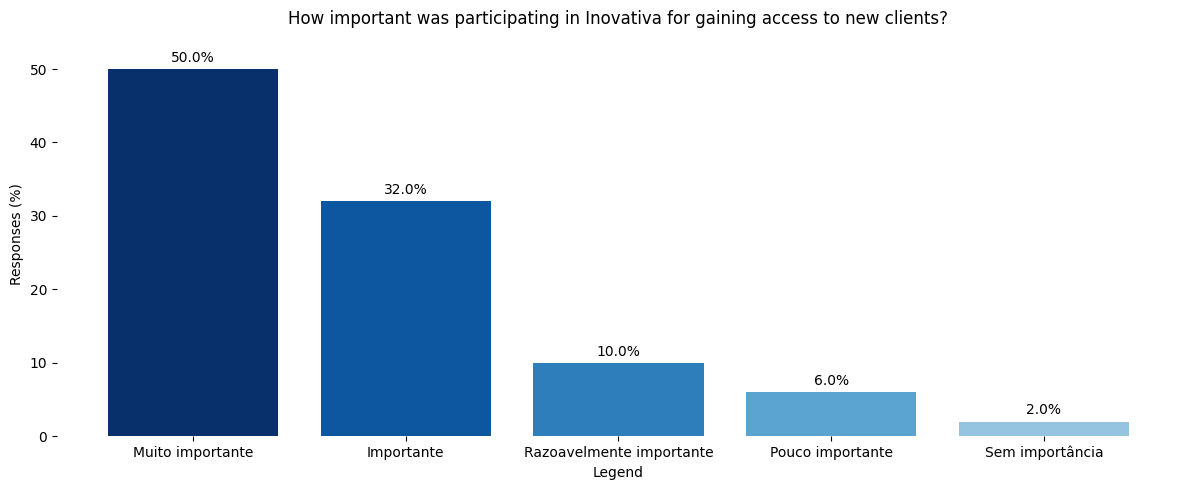

In [44]:
percentages = data[
    "Para você ter acesso a novos clientes, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for gaining access to new clients?"
)
plt.tight_layout()
plt.savefig("new_clients.png")
plt.show()


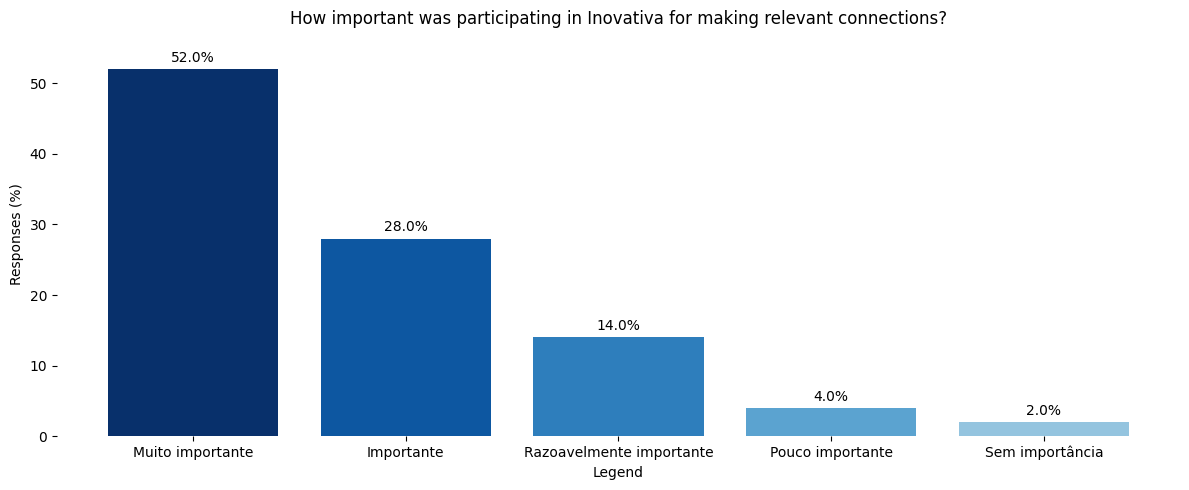

In [45]:
percentages = data[
    "Para você fazer conexões relevantes, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for making relevant connections?"
)
plt.tight_layout()
plt.savefig("project_importance.png")
plt.show()


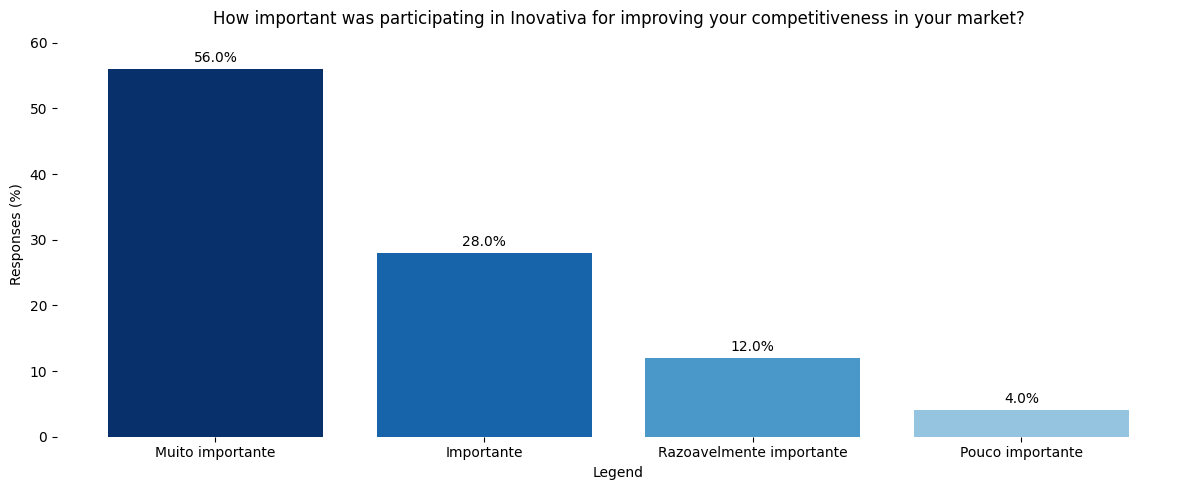

In [46]:
percentages = data[
    "Para você melhorar a sua competitividade no seu mercado de atuação, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for improving your competitiveness in your market?"
)
plt.tight_layout()
plt.savefig("market_competitiveness.png")
plt.show()


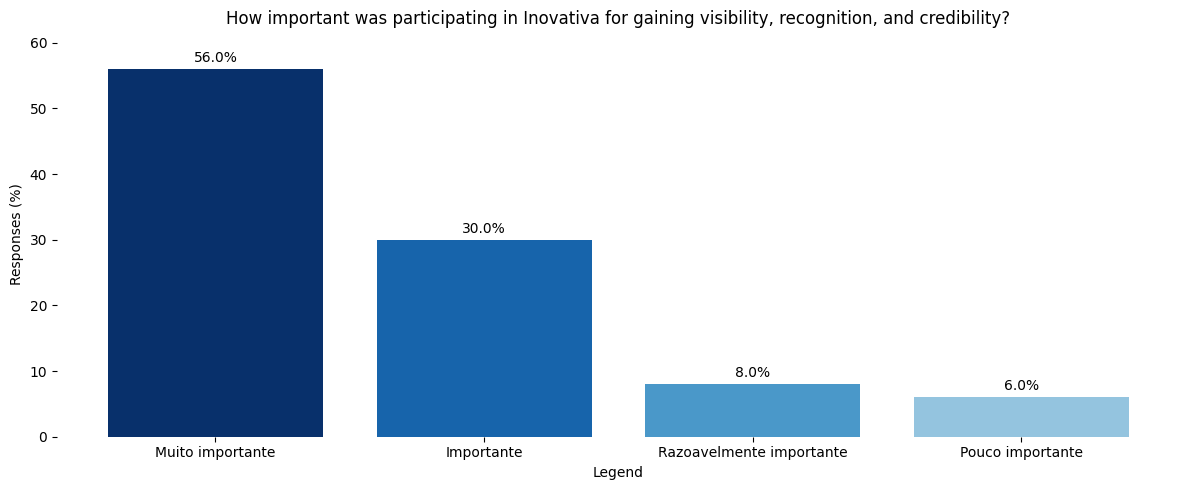

In [47]:
percentages = data[
    "Para você ganhar visibilidade, reconhecimento e credibilidade, o quanto participar do Inovativa foi importante?"
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "How important was participating in Inovativa for gaining visibility, recognition, and credibility?"
)
plt.tight_layout()
plt.savefig("marketing.png")
plt.show()

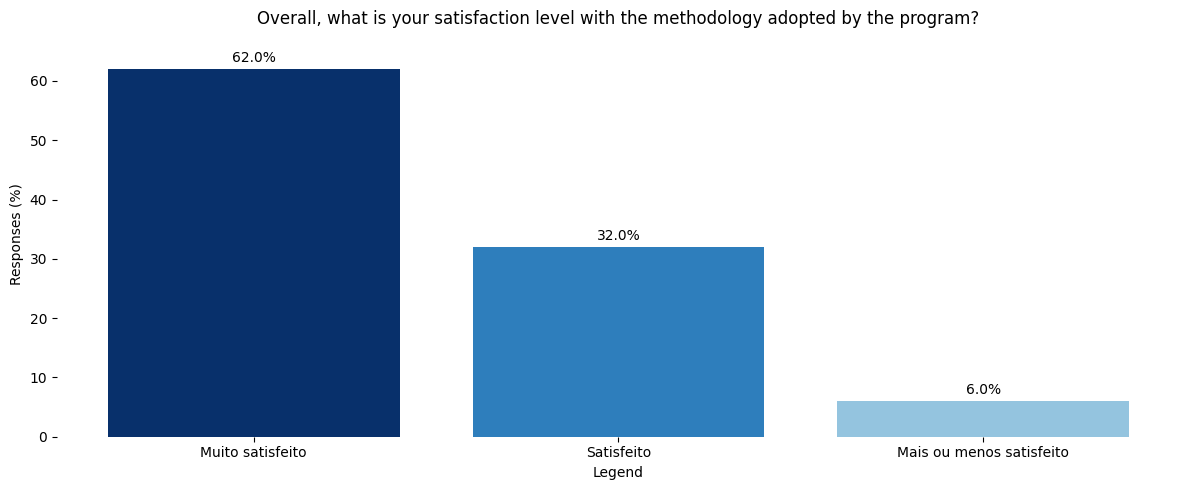

In [48]:
percentages = data[
    'Em geral, qual o seu nível de satisfação com a metodologia adotada pelo programa?'
].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title(
    "Overall, what is your satisfaction level with the methodology adopted by the program?"
)
plt.tight_layout()
plt.savefig("satisfaction_gradient.png")
plt.show()

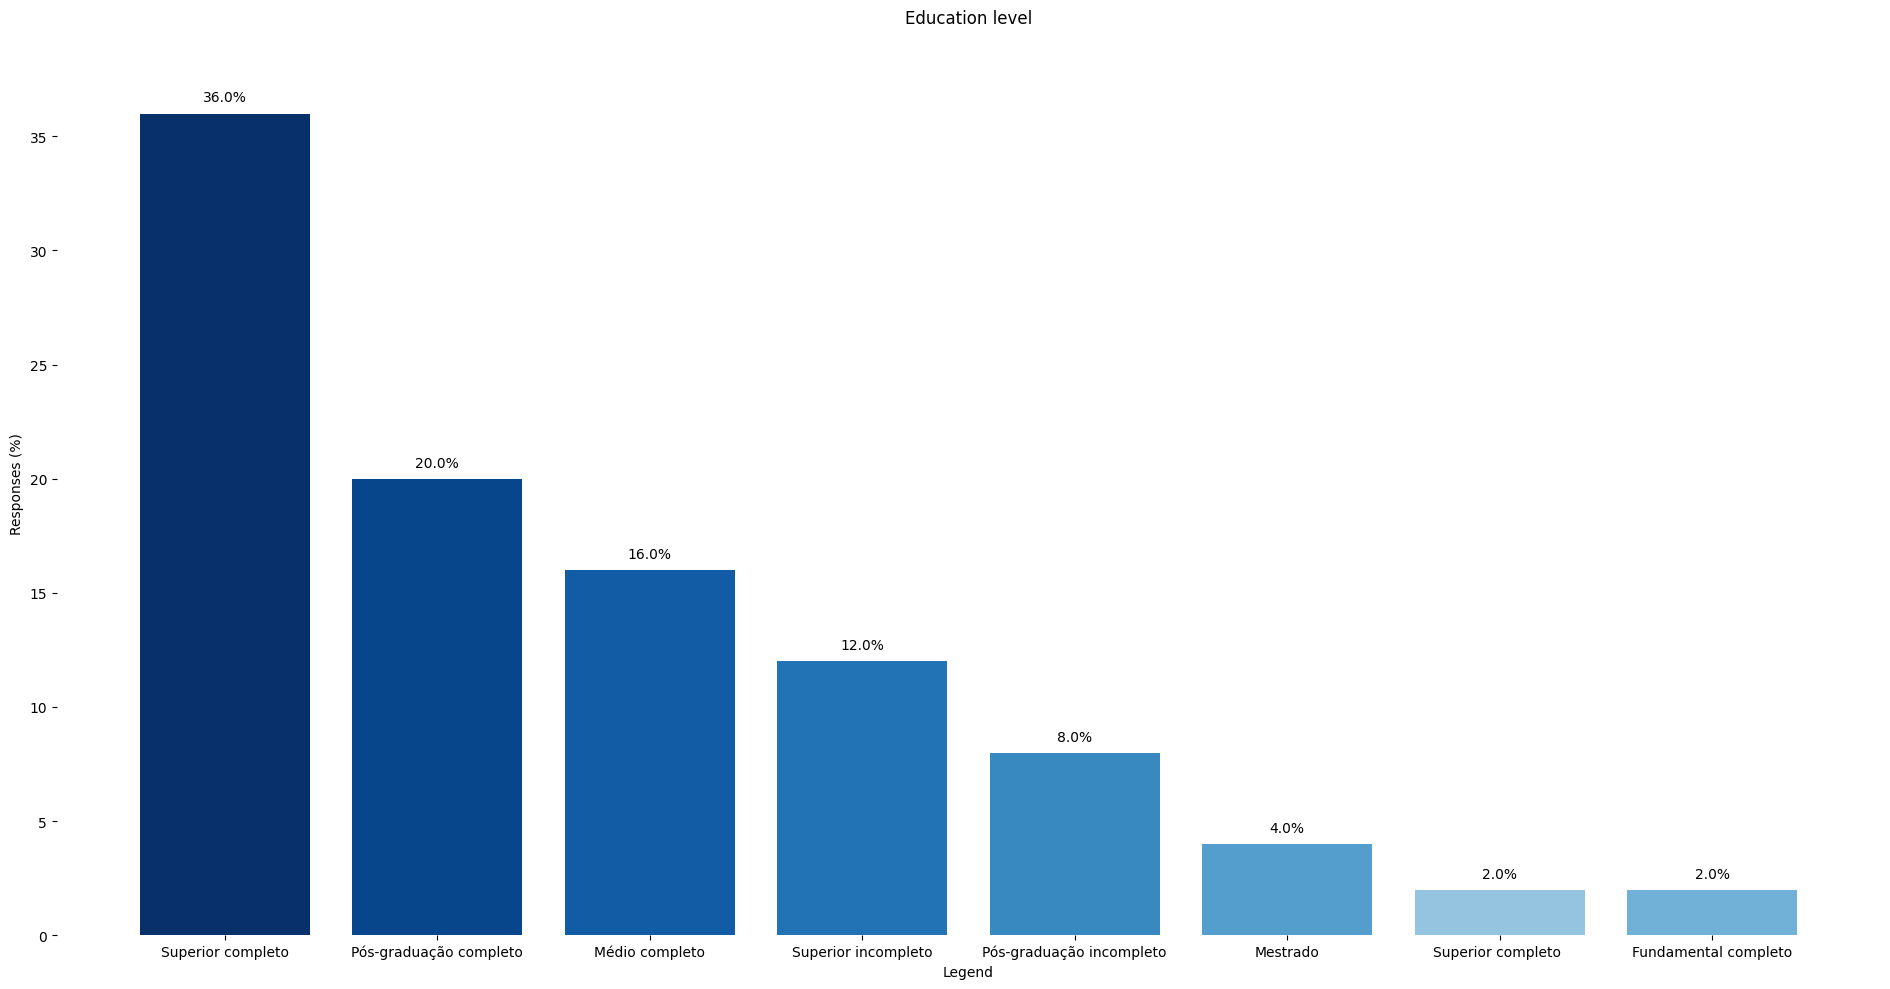

In [49]:
percentages = data['Grau de escolaridade'].value_counts(normalize=True) * 100

plt.figure(figsize=(19, 10))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title("Education level")
plt.tight_layout()
plt.savefig("participants_education.png")
plt.show()

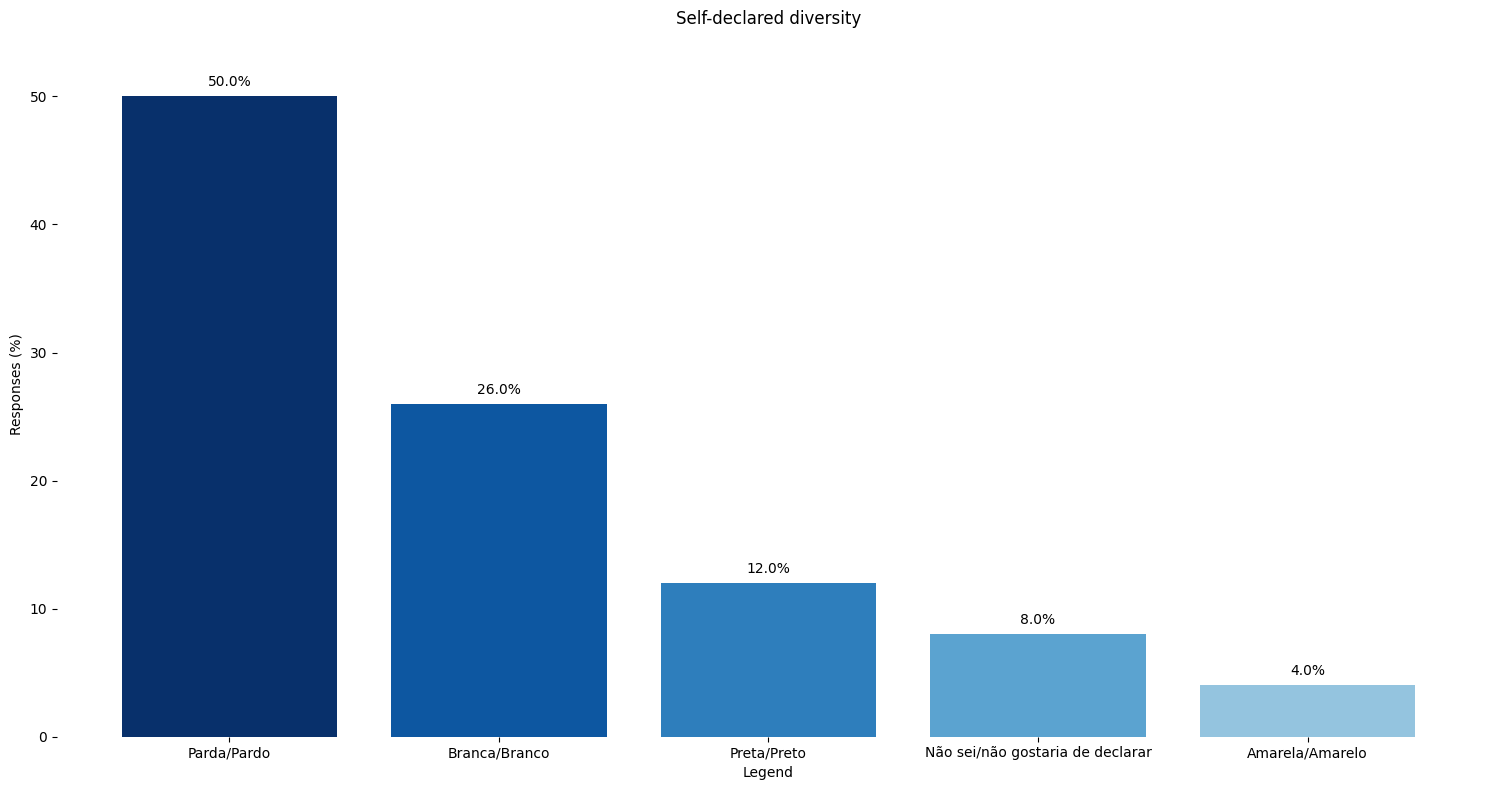

In [50]:
percentages = data['Como você se auto declara'].value_counts(normalize=True) * 100

plt.figure(figsize=(15, 8))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title("Self-declared diversity")
plt.tight_layout()
plt.savefig("diversity.png")
plt.show()

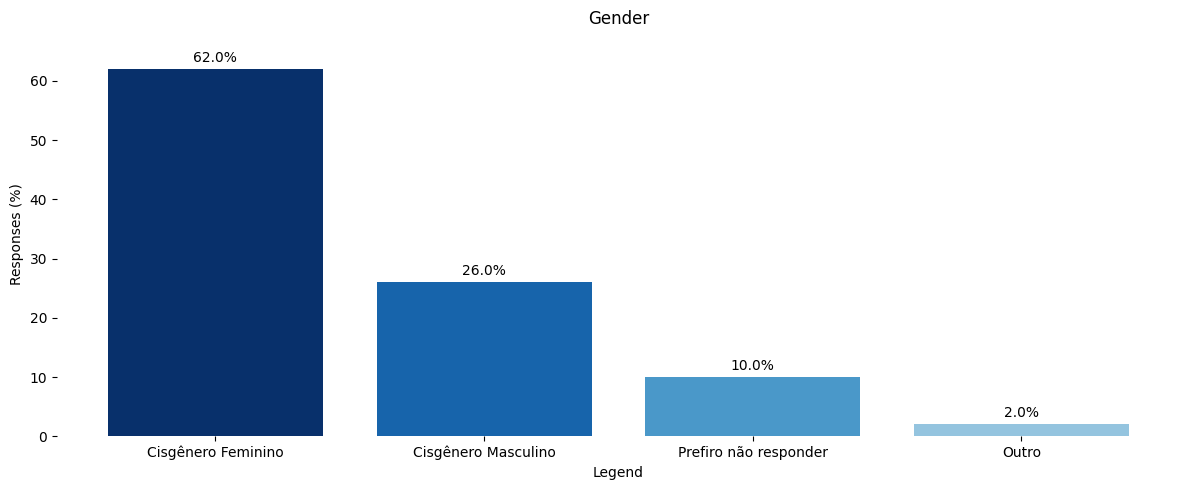

In [51]:
percentages = data['Qual seu gênero'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 5))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title("Gender")
plt.tight_layout()
plt.savefig("gender.png")
plt.show()

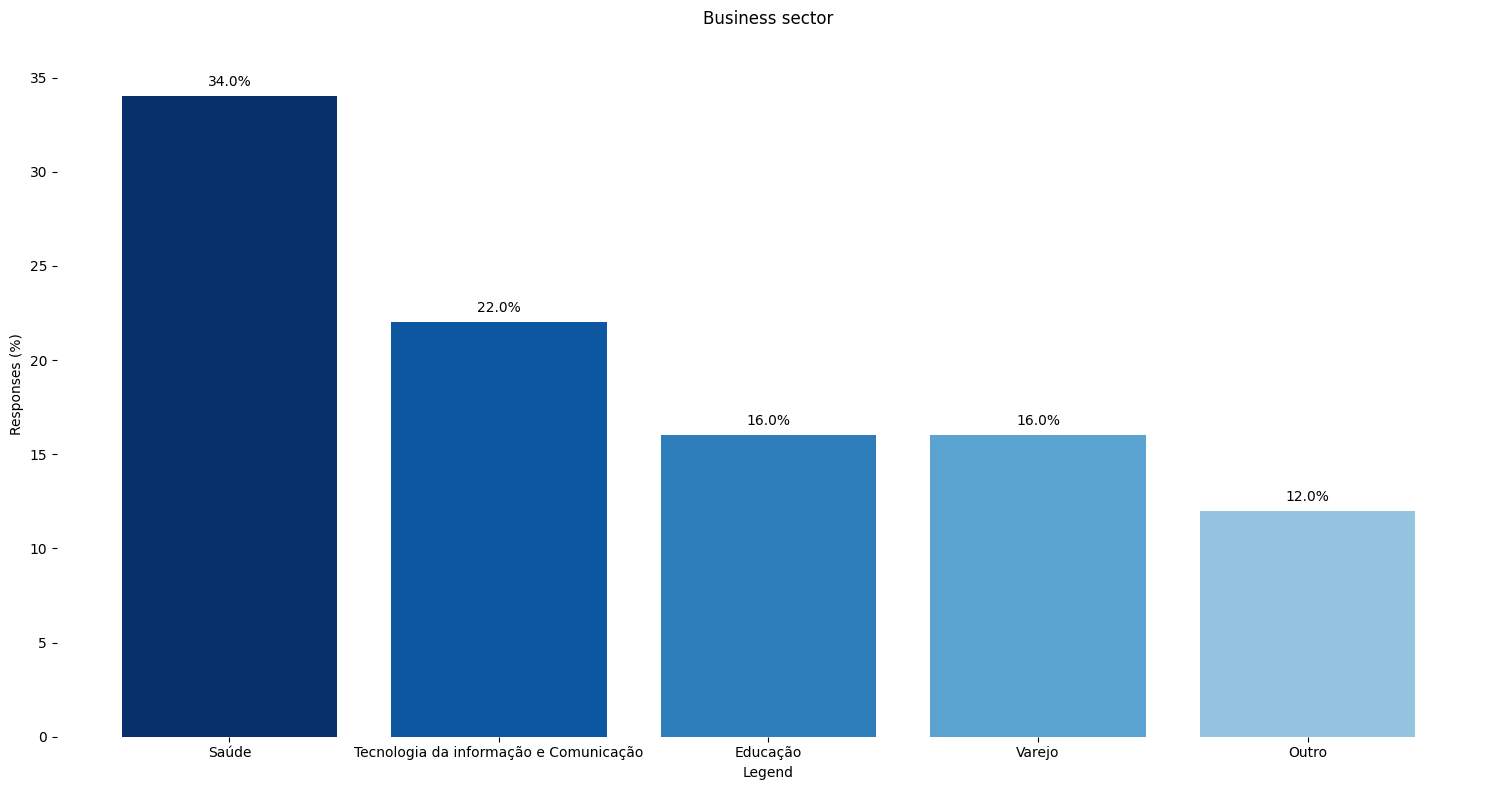

In [52]:
percentages = data['Qual o ramo do seu negócio?'].value_counts(normalize=True) * 100

plt.figure(figsize=(15, 8))

sorted_indices = np.argsort(percentages.values)
colors_map = cm.Blues(np.linspace(0.4, 1, len(percentages)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

bars = plt.bar(percentages.index, percentages.values, color=colors, edgecolor="none")

y_max = max(percentages.values) * 1.1
plt.ylim(0, y_max)
plt.margins(x=0.05)

for i, v in enumerate(percentages.values):
    plt.text(
        i,
        v + 0.01 * y_max,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal",
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlabel("Legend")
plt.ylabel("Responses (%)")
plt.title("Business sector")
plt.tight_layout()
plt.savefig("market_niche.png")
plt.show()

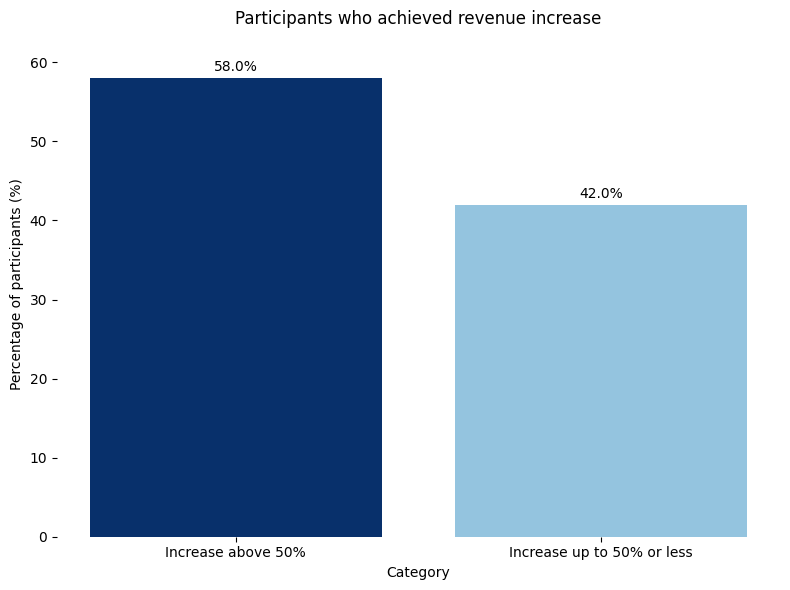

In [53]:
data['Aumento Faturamento'] = (
    (data['Faturamento após o programa'] - data['Faturamento antes do programa'])
    / data['Faturamento antes do programa']
) * 100

percentual_acima_50 = (data['Aumento Faturamento'] > 50).mean() * 100
percentual_ate_50 = 100 - percentual_acima_50

categories = ['Increase above 50%', 'Increase up to 50% or less']
values = [percentual_acima_50, percentual_ate_50]

# Criar gradiente: azul escuro para maior valor
sorted_indices = np.argsort(values)[::-1]  # indices do maior para o menor
colors_map = cm.Blues(np.linspace(1, 0.4, len(values)))
colors = np.empty_like(colors_map)
colors[sorted_indices] = colors_map

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors, edgecolor='none')

y_max = max(values) * 1.1
plt.ylim(0, y_max)

for i, v in enumerate(values):
    plt.text(
        i,
        v + 0.5,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal"
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xlabel('Category')
plt.ylabel('Percentage of participants (%)')
plt.title('Participants who achieved revenue increase')
plt.tight_layout()
plt.savefig('revenue_increase_comparison.png')
plt.show()

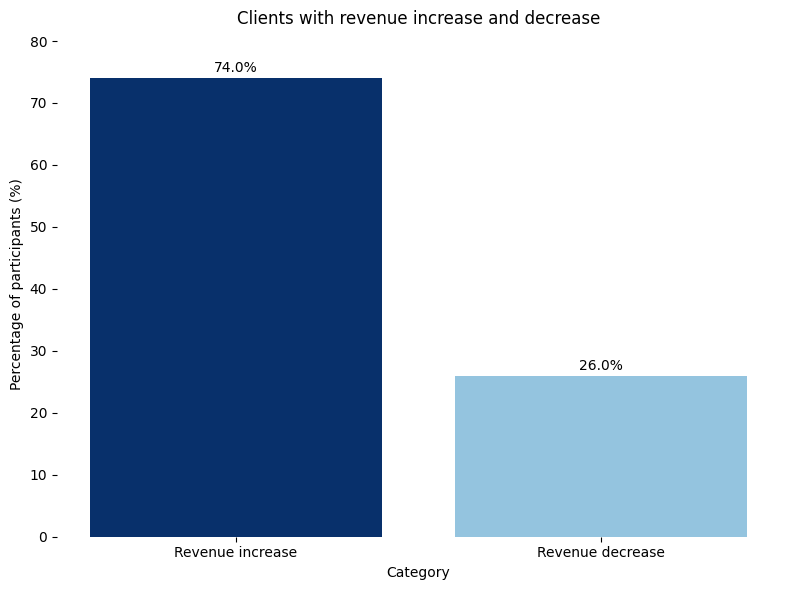

In [54]:
data['Aumento Percentual'] = (
    (data['Faturamento após o programa'] - data['Faturamento antes do programa'])
    / data['Faturamento antes do programa']
) * 100

percentual_acima_0 = (data['Aumento Percentual'] > 0).mean() * 100
percentual_abaixo_0 = 100 - percentual_acima_0

categories = ['Revenue increase', 'Revenue decrease']
values = [percentual_acima_0, percentual_abaixo_0]

# Gradiente azul: azul escuro para maior, azul claro para menor
if values[0] >= values[1]:
    colors = [cm.Blues(1.0), cm.Blues(0.4)]
else:
    colors = [cm.Blues(0.4), cm.Blues(1.0)]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors, edgecolor='none')

y_max = max(values) * 1.1
plt.ylim(0, y_max)

for i, v in enumerate(values):
    plt.text(
        i,
        v + 0.5,
        f"{v:.1f}%",
        ha="center",
        va="bottom",
        color="black",
        fontweight="normal"
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xlabel('Category')
plt.ylabel('Percentage of participants (%)')
plt.title('Clients with revenue increase and decrease')
plt.tight_layout()
plt.savefig('revenue_change_bars.png')
plt.show()

# Generating automatic pdf report

In [75]:
styles = getSampleStyleSheet()
styles['Normal'].alignment = 4

analise_profile = """
During the impact evaluation, the participants profile shows distributions 
related to education level, diversity, gender, income, market niche, and 
market competitiveness.
"""

analise_employability = """
After the program, a percentage of participants reported creating at least 
one new job, indicating a direct impact on employability. Indirect effects 
may be inferred from the revenue growth observed.
"""

analise_revenue = """
The revenue analysis shows the proportion of participants who experienced 
an increase or decrease in revenue, as well as the percentage achieving 
more than 50% growth.
"""

analise_project_importance = """
The perceived importance analysis summarizes participants responses across 
all evaluated categories, indicating the program's overall positive impact.
"""

content = []

content.append(Paragraph("Profile Analysis:", styles['Normal']))
content.append(Paragraph(analise_profile, styles['Normal']))

profile_imgs = [
    'participants_education.png',
    'diversity.png',
    'gender.png',
    'income.png',
    'market_niche.png',
    'market_competitiveness.png'
]

for img_path in profile_imgs:
    pil_img = PILImage.open(img_path)
    width = 400
    height = int((pil_img.height / pil_img.width) * width)
    content.append(Image(img_path, width=width, height=height))
content.append(Spacer(1, 20))

content.append(Paragraph("Employability Analysis:", styles['Normal']))
content.append(Paragraph(analise_employability, styles['Normal']))
pil_img = PILImage.open('jobs.png')
width = 400
height = int((pil_img.height / pil_img.width) * width)
content.append(Image('jobs.png', width=width, height=height))
content.append(Spacer(1, 20))

content.append(Paragraph("Revenue Analysis:", styles['Normal']))
content.append(Paragraph(analise_revenue, styles['Normal']))

revenue_imgs = ['revenue_change_bars.png', 'revenue_increase_comparison.png']
for img_path in revenue_imgs:
    pil_img = PILImage.open(img_path)
    width = 400
    height = int((pil_img.height / pil_img.width) * width)
    content.append(Image(img_path, width=width, height=height))
content.append(Spacer(1, 20))

content.append(Paragraph("Project Importance Analysis:", styles['Normal']))
content.append(Paragraph(analise_project_importance, styles['Normal']))
pil_img = PILImage.open('project_importance.png')
width = 400
height = int((pil_img.height / pil_img.width) * width)
content.append(Image('project_importance.png', width=width, height=height))
content.append(Spacer(1, 20))

other_imgs = [
    'network.png',
    'new_clients.png',
    'innovation.png',
    'startup_acceleration.png',
    'marketing.png',
    'motivation.png',
    'method.png'
]

content.append(Paragraph("Other Program Impacts:", styles['Normal']))
for img_path in other_imgs:
    pil_img = PILImage.open(img_path)
    width = 400
    height = int((pil_img.height / pil_img.width) * width)
    content.append(Image(img_path, width=width, height=height))
content.append(Spacer(1, 20))

pdf_filename = 'report.pdf'
pdf = SimpleDocTemplate(pdf_filename, pagesize=letter)
pdf.build(content)

# Automated sending of the exploratory report via email

In [ ]:
def send_email(recipient, subject, message, attachment):
    smtp_host = 'smtp.gmail.com'
    smtp_port = 587
    user_email = 'your_email@gmail.com'
    user_password = 'your_email_password'

    sender = user_email
    recipients = [recipient]

    msg = MIMEMultipart()
    msg['From'] = sender
    msg['To'] = ', '.join(recipients)
    msg['Subject'] = subject

    msg.attach(MIMEText(message, 'plain'))

    with open(attachment, 'rb') as file:
        part = MIMEApplication(file.read())
        part.add_header('Content-Disposition', 'attachment', filename=attachment)
        msg.attach(part)

    with smtplib.SMTP(smtp_host, smtp_port) as server:
        server.starttls()
        server.login(user_email, user_password)
        server.sendmail(sender, recipients, msg.as_string())


recipient_email = 'recipient@gmail.com'
email_subject = 'Exploratory Data Report'
email_message = (
    'Dear recipient,\n\n'
    'Please find attached the exploratory data report.\n\n'
    'Best regards,\nYour Name'
)
pdf_file = 'exploratory_report.pdf'

send_email(recipient_email, email_subject, email_message, pdf_file)